# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

## Importing Packages

In [223]:
#Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

plt.style.use('seaborn')

%matplotlib inline

## Reading the Datasets

In [224]:
#Reading the datasets
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
conn = sqlite3.connect('im.db')
imdb_movie_basics = pd.read_sql("SELECT * from movie_basics;",conn)
imdb_movie_ratings = pd.read_sql("SELECT * from movie_ratings;",conn)
conn.close()

In [225]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [226]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [227]:
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [228]:
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [229]:
imdb_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [230]:
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Joining the Datasets

In [231]:
#Joining the imdb data tables
imdb_movie_basics.set_index('movie_id',inplace=True)
imdb_movie_ratings.set_index('movie_id',inplace=True)
imdb_movie_basic_ratings = imdb_movie_basics.join(imdb_movie_ratings,how='inner')
imdb_movie_basic_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [232]:
#Joining the merged imdb tables with the bom_movie_gross table
bom_movie_gross.set_index('title',inplace=True)
imdb_movie_basic_ratings.set_index('primary_title',inplace=True)
bom_imdb = bom_movie_gross.join(imdb_movie_basic_ratings,how='inner')
bom_imdb.head()

,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103
"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
10 Years,Anch.,203000.0,NaN,2012,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484
1001 Grams,KL,11000.0,NaN,2015,1001 Gram,2014,93.0,Drama,6.3,1301


In [233]:
#Reseting the index of the bom_imdb dataframe
bom_imdb = bom_imdb.reset_index()
bom_imdb = bom_imdb.rename(columns={'index':'primary_title'})
bom_imdb.head()

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103
1,"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848
2,10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
3,10 Years,Anch.,203000.0,NaN,2012,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484
4,1001 Grams,KL,11000.0,NaN,2015,1001 Gram,2014,93.0,Drama,6.3,1301


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Data Cleaning

In [234]:
bom_imdb.describe()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,3.005000e+03,3027.000000,3027.000000,2980.000000,3027.000000,3.027000e+03
mean,3.064033e+07,2014.077635,2013.783284,107.217114,6.457582,6.170030e+04
std,6.671629e+07,2.442245,2.466955,20.073886,1.012277,1.255132e+05
min,1.000000e+02,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00
25%,1.390000e+05,2012.000000,2012.000000,94.000000,5.900000,2.117000e+03
50%,2.000000e+06,2014.000000,2014.000000,105.000000,6.600000,1.310900e+04
75%,3.250000e+07,2016.000000,2016.000000,118.000000,7.100000,6.276550e+04
max,7.001000e+08,2018.000000,2019.000000,272.000000,9.200000,1.841066e+06


In [235]:
bom_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   original_title   3027 non-null   object 
 6   start_year       3027 non-null   int64  
 7   runtime_minutes  2980 non-null   float64
 8   genres           3020 non-null   object 
 9   averagerating    3027 non-null   float64
 10  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 260.3+ KB


In [236]:
#Checking missing or null values
bom_imdb.isnull().sum()

primary_title         0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
dtype: int64

In [237]:
#Checking duplicate values
bom_imdb.duplicated().sum()

0

In [238]:
#Since missing values in foreign_gross are almost more than half we replace with median
#Change the column to float
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].str.replace(',', '').astype(float)
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].fillna(bom_imdb['foreign_gross'].median())

In [239]:
bom_imdb.isnull().sum()

primary_title       0
studio              3
domestic_gross     22
foreign_gross       0
year                0
original_title      0
start_year          0
runtime_minutes    47
genres              7
averagerating       0
numvotes            0
dtype: int64

In [240]:
#Drop all the rows that still contain null values
bom_imdb.dropna(axis=0, inplace =True)

In [241]:
bom_imdb.isnull().sum()

primary_title      0
studio             0
domestic_gross     0
foreign_gross      0
year               0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [242]:
bom_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    2952 non-null   object 
 1   studio           2952 non-null   object 
 2   domestic_gross   2952 non-null   float64
 3   foreign_gross    2952 non-null   float64
 4   year             2952 non-null   int64  
 5   original_title   2952 non-null   object 
 6   start_year       2952 non-null   int64  
 7   runtime_minutes  2952 non-null   float64
 8   genres           2952 non-null   object 
 9   averagerating    2952 non-null   float64
 10  numvotes         2952 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 276.8+ KB


In [243]:
bom_imdb['domestic_gross_in_million_$'] = bom_imdb['domestic_gross'] / 1e6
bom_imdb['foreign_gross_in_million_$'] = bom_imdb['foreign_gross'] / 1e6
bom_imdb['numvotes'] = bom_imdb['numvotes'].astype(float) 

In [244]:
bom_imdb.drop(labels=['studio','domestic_gross','foreign_gross','original_title','year','start_year'], axis=1, inplace=True)
bom_imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross_in_million_$,foreign_gross_in_million_$
0,'71,99.0,"Action,Drama,Thriller",7.2,46103.0,1.3000,0.355
1,"1,000 Times Good Night",117.0,"Drama,War",7.1,6848.0,0.0539,21.200
2,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383.0,72.1000,38.100
3,10 Years,100.0,"Comedy,Drama,Romance",6.1,22484.0,0.2030,21.200
4,1001 Grams,93.0,Drama,6.3,1301.0,0.0110,21.200


In [245]:
bom_imdb.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross_in_million_$,foreign_gross_in_million_$
count,2952.000000,2952.000000,2.952000e+03,2952.000000,2952.000000
mean,107.305894,6.464837,6.319074e+04,30.680274,56.154408
std,20.043335,0.994953,1.267370e+05,67.089697,112.295519
min,3.000000,1.600000,5.000000e+00,0.000100,0.000600
25%,94.000000,5.900000,2.500500e+03,0.136750,14.050000
50%,105.000000,6.600000,1.387750e+04,2.000000,21.200000
75%,118.000000,7.100000,6.666950e+04,32.425000,34.450000
max,272.000000,9.200000,1.841066e+06,700.100000,946.400000


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Data Analysis

In [246]:
cat_cols= bom_imdb.select_dtypes(include=['object']).columns
num_cols = bom_imdb.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['primary_title', 'genres'], dtype='object')
Numerical Variables:
['runtime_minutes', 'averagerating', 'numvotes', 'domestic_gross_in_million_$', 'foreign_gross_in_million_$']


runtime_minutes
Skew : 0.64


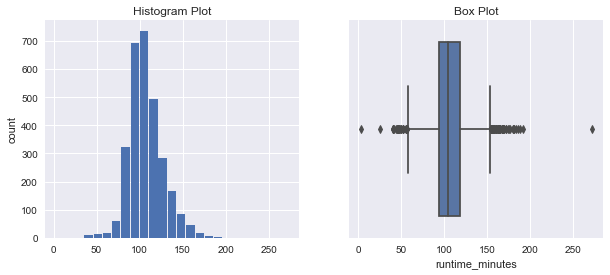

averagerating
Skew : -0.83


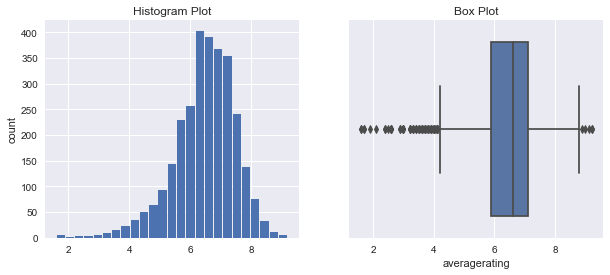

numvotes
Skew : 4.44


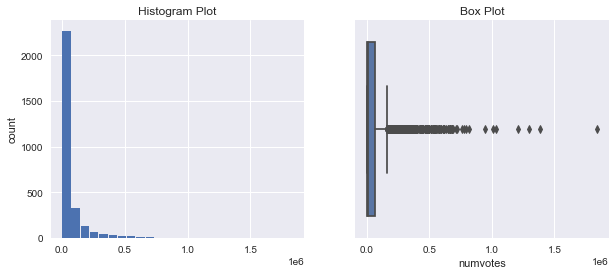

domestic_gross_in_million_$
Skew : 4.15


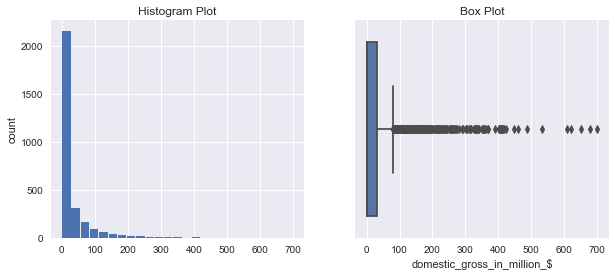

foreign_gross_in_million_$
Skew : 4.04


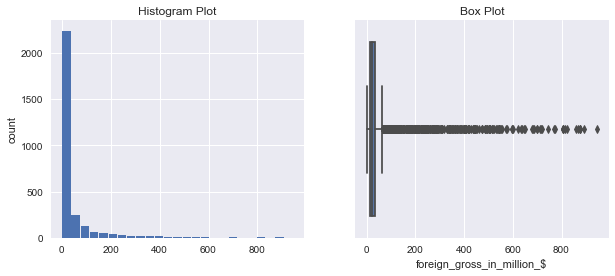

In [339]:
for col in num_cols:
    print(col)
    print('Skew :', round(bom_imdb[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    plt.title('Histogram Plot')
    bom_imdb[col].hist(grid=True,bins=25,rwidth=0.9)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=bom_imdb[col])
    plt.title('Box Plot')
    plt.show()

In [ ]:
bom_imdb['genres'].value_counts()

Drama                       301
Comedy,Drama                132
Comedy,Drama,Romance        132
Drama,Romance               111
Documentary                 104
                           ... 
Comedy,Horror,Romance         1
Comedy,Crime,Horror           1
Adventure,Comedy,Romance      1
Adventure,Comedy,Horror       1
Documentary,History,News      1
Name: genres, Length: 317, dtype: int64

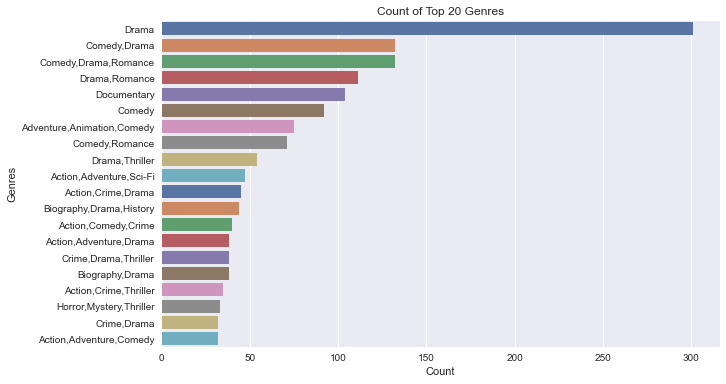

In [342]:
#Count plot for the top 20 genres
top_genres = bom_imdb['genres'].value_counts().head(20)

plt.figure(figsize=(10, 6))
plt.title('Count of Top 20 Genres')
sns.countplot(y='genres', data=bom_imdb, order=top_genres.index,palette='deep')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [208]:
#Compare the total_domestic gross across each genre
total_domestic_gross = bom_imdb.groupby('genres')['domestic_gross_in_million_$'].sum().sort_values(ascending=False).head(20)
total_domestic_gross

genres
Action,Adventure,Sci-Fi       11024.699999
Adventure,Animation,Comedy     9645.132598
Action,Adventure,Fantasy       4378.787000
Action,Adventure,Comedy        3172.472299
Drama                          2671.187298
Comedy                         2357.256699
Action,Adventure,Animation     2184.660400
Action,Adventure,Thriller      1851.798000
Comedy,Romance                 1848.590100
Action,Comedy,Crime            1812.072900
Action,Adventure,Drama         1753.572800
Comedy,Drama                   1730.643700
Action,Crime,Thriller          1673.852000
Comedy,Drama,Romance           1673.456699
Documentary                    1638.764998
Horror,Mystery,Thriller        1484.527600
Action,Thriller                1375.148399
Biography,Drama,History        1275.551399
Drama,Romance                  1042.107000
Action,Crime,Drama             1011.920000
Name: domestic_gross_in_million_$, dtype: float64

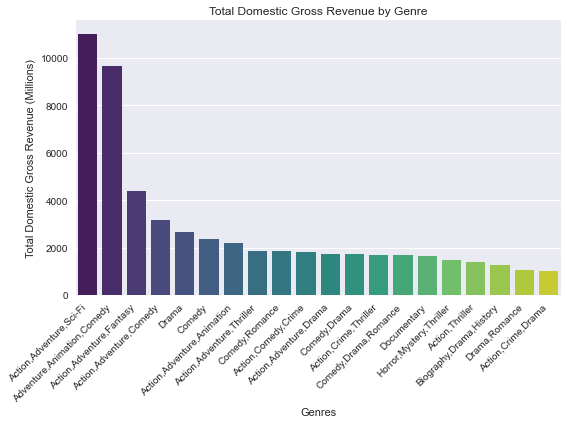

In [335]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_domestic_gross.index, y=total_domestic_gross.values,palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Total Domestic Gross Revenue (Millions)')
plt.title('Total Domestic Gross Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [210]:
#Compare the total_foreign gross across each genre
total_foreign_gross = bom_imdb.groupby('genres')['foreign_gross_in_million_$'].sum().sort_values(ascending=False).head(20)
total_foreign_gross

genres
Adventure,Animation,Comedy    18025.799999
Action,Adventure,Sci-Fi       16632.602389
Action,Adventure,Fantasy       8936.100000
Drama                          7042.662198
Action,Adventure,Comedy        6642.600000
Action,Adventure,Thriller      4769.500000
Action,Adventure,Animation     4375.500000
Action,Adventure,Drama         3754.531999
Comedy                         3233.573500
Documentary                    3126.483400
Comedy,Drama,Romance           3081.209599
Comedy,Drama                   2762.885100
Drama,Romance                  2599.209499
Action,Thriller                2593.900000
Action,Drama,Thriller          2324.155000
Comedy,Romance                 2288.871999
Adventure,Family,Fantasy       2156.400000
Action,Crime,Thriller          2009.302173
Horror,Mystery,Thriller        1863.900000
Horror                         1682.505200
Name: foreign_gross_in_million_$, dtype: float64

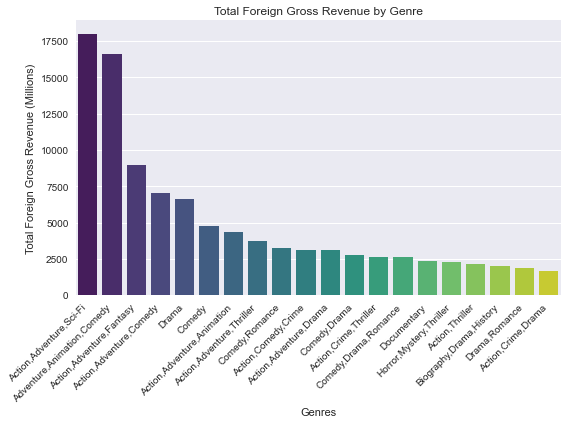

In [336]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_domestic_gross.index, y=total_foreign_gross.values,palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Total Foreign Gross Revenue (Millions)')
plt.title('Total Foreign Gross Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [251]:
bom_imdb['total_gross_million_$'] = bom_imdb['domestic_gross_in_million_$'] + bom_imdb['foreign_gross_in_million_$']
total_gross = bom_imdb.groupby('genres')['total_gross_million_$'].sum().sort_values(ascending=False).head(20)
total_gross

genres
Adventure,Animation,Comedy    27670.932597
Action,Adventure,Sci-Fi       27657.302388
Action,Adventure,Fantasy      13314.887000
Action,Adventure,Comedy        9815.072299
Drama                          9713.849496
Action,Adventure,Thriller      6621.298000
Action,Adventure,Animation     6560.160400
Comedy                         5590.830199
Action,Adventure,Drama         5508.104799
Documentary                    4765.248398
Comedy,Drama,Romance           4754.666298
Comedy,Drama                   4493.528800
Comedy,Romance                 4137.462099
Action,Thriller                3969.048399
Action,Crime,Thriller          3683.154173
Drama,Romance                  3641.316499
Action,Comedy,Crime            3425.341900
Horror,Mystery,Thriller        3348.427600
Adventure,Family,Fantasy       3079.900000
Biography,Drama,History        2859.559399
Name: total_gross_million_$, dtype: float64

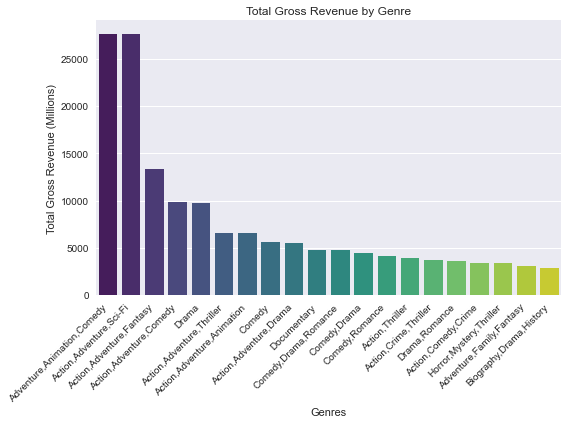

In [337]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_gross.index, y=total_gross.values,palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Total Gross Revenue (Millions)')
plt.title('Total Gross Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

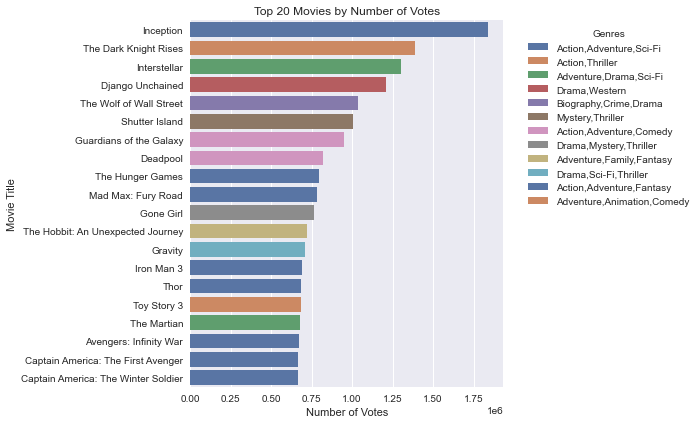

In [323]:
#Compare number of votes vs movie genres
top_20_movies = bom_imdb.nlargest(20,'numvotes')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_movies, x='numvotes', y='primary_title',hue='genres',palette='deep',dodge=False)
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Number of Votes')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

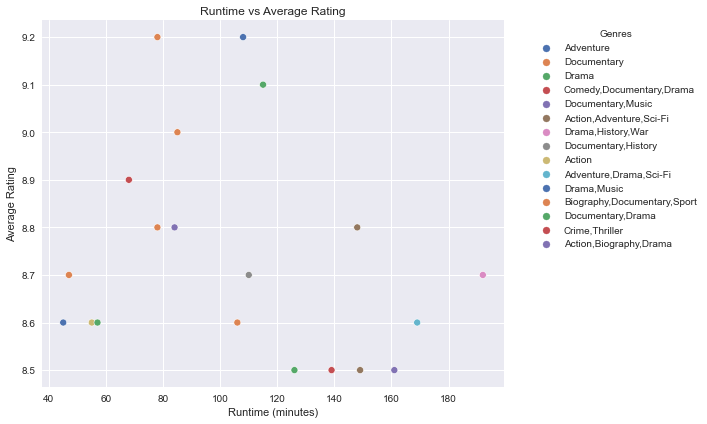

In [322]:
#Compare runtime minutes to ratings
top_20_movies = bom_imdb.nlargest(20,'averagerating')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_20_movies, x='runtime_minutes', y='averagerating', hue='genres', palette='deep')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Runtime vs Average Rating')
plt.legend(title='Genres')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***